# Read results

## Librairies

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Parameters 

In [2]:
cwd = os.getcwd()

In [3]:
path = "../results/Synthetic/"

In [111]:
# === Choose p for which results are to be computed ===
p_values = [1000] # 2000, 3000, 4000
n__values =  [10]

# percent_relevent_values = [4.6] # 4.25
percent_relevent_values = [n__values[0] / np.log(p_values[0]) * 3.5]

percent_values = [1.25, 2.5, 3.75, 5.0]#, 6.25, 7.5]

## Get scores 

In [112]:
results_d = {}

# level 1
for p in p_values:

    results_folder = os.path.join(path, f"synthetic_data_{p}")
    

    ns = [int(p//n_) for n_ in n__values]
    nzs = [int(p*percent//100) for percent in percent_values]
    nrs = [int(p*percent//100) for percent in percent_relevent_values]

    fts_modes = ["full", "random", "k-best", "k-best-mi", "lasso", "pk-lpnn"]
    models = ["knn", "lr", "nb-gaussian"]
        
    results_d[p] = {}
    
    # level 2
    for n in ns:
        
        results_d[p][n] = {}
        nr = nrs[0]  # XXX
        
        # level 3
        for nz in nzs:

            results_d[p][n][nz] = {}
            
            for fts_mode in fts_modes:

                results_d[p][n][nz][fts_mode] = {}

                for model in models:

                    with open( os.path.join(results_folder, f"{n}", f"{nz}", f"{fts_mode}_{nz}_{model}.pkl"), "rb" ) as fh: #XXXXX

                        results = pickle.load(fh)
                        f1 = np.mean(results["f1"]).round(3)
                        b_acc = np.mean(results["b_acc"]).round(3)
                        # print("f1: ", f1, "b_acc: ", b_acc)

                        results_d[p][n][nz][fts_mode][model] = (f1, b_acc)

In [113]:
# results_d

## Scores tables

In [114]:
results_df = {}

for p in p_values:
    
    print("****************")
    print(f"*** p = {p} ***")
    print("****************\n")
    
    ns = [int(p//n_) for n_ in n__values]
    nzs = [int(p*percent//100) for percent in percent_values]
    nrs = [int(p*percent//100) for percent in percent_relevent_values]
    
    results_df[p] = {}
    
    for n in ns:
        
        results_df[p][n] = {}
        nr = nrs[0]  # XXX

        for nz in nzs:

            results_df[p][n][nz] = pd.DataFrame.from_dict(results_d[p][n][nz], orient='index')
            print(f"*** n = {n}, nb_relevant = {nr} ({n}_{nr}), N_z = {nz} ***")
            display(results_df[p][n][nz])
            print(results_df[p][n][nz].to_latex(bold_rows=True, 
                                                column_format="l | ccc", 
                                               )
                 ) # latex code
            print("\n")

****************
*** p = 1000 ***
****************

*** n = 100, nb_relevant = 50 (100_50), N_z = 12 ***


,knn,lr,nb-gaussian
full,"(0.556, 0.587)","(0.781, 0.799)","(0.69, 0.716)"
random,"(0.535, 0.56)","(0.596, 0.619)","(0.562, 0.586)"
k-best,"(0.661, 0.689)","(0.678, 0.703)","(0.672, 0.697)"
k-best-mi,"(0.528, 0.558)","(0.582, 0.606)","(0.553, 0.588)"
lasso,"(0.69, 0.721)","(0.682, 0.705)","(0.671, 0.696)"
pk-lpnn,"(0.716, 0.742)","(0.731, 0.752)","(0.725, 0.744)"


\begin{tabular}{l | ccc}
\toprule
 & knn & lr & nb-gaussian \\
\midrule
\textbf{full} & (np.float64(0.556), np.float64(0.587)) & (np.float64(0.781), np.float64(0.799)) & (np.float64(0.69), np.float64(0.716)) \\
\textbf{random} & (np.float64(0.535), np.float64(0.56)) & (np.float64(0.596), np.float64(0.619)) & (np.float64(0.562), np.float64(0.586)) \\
\textbf{k-best} & (np.float64(0.661), np.float64(0.689)) & (np.float64(0.678), np.float64(0.703)) & (np.float64(0.672), np.float64(0.697)) \\
\textbf{k-best-mi} & (np.float64(0.528), np.float64(0.558)) & (np.float64(0.582), np.float64(0.606)) & (np.float64(0.553), np.float64(0.588)) \\
\textbf{lasso} & (np.float64(0.69), np.float64(0.721)) & (np.float64(0.682), np.float64(0.705)) & (np.float64(0.671), np.float64(0.696)) \\
\textbf{pk-lpnn} & (np.float64(0.716), np.float64(0.742)) & (np.float64(0.731), np.float64(0.752)) & (np.float64(0.725), np.float64(0.744)) \\
\bottomrule
\end{tabular}



*** n = 100, nb_relevant = 50 (100_50), N_z = 25 

,knn,lr,nb-gaussian
full,"(0.556, 0.587)","(0.781, 0.799)","(0.69, 0.716)"
random,"(0.545, 0.57)","(0.648, 0.667)","(0.581, 0.607)"
k-best,"(0.702, 0.73)","(0.688, 0.713)","(0.706, 0.728)"
k-best-mi,"(0.543, 0.575)","(0.65, 0.675)","(0.573, 0.603)"
lasso,"(0.726, 0.756)","(0.736, 0.757)","(0.714, 0.735)"
pk-lpnn,"(0.745, 0.768)","(0.739, 0.758)","(0.751, 0.771)"


\begin{tabular}{l | ccc}
\toprule
 & knn & lr & nb-gaussian \\
\midrule
\textbf{full} & (np.float64(0.556), np.float64(0.587)) & (np.float64(0.781), np.float64(0.799)) & (np.float64(0.69), np.float64(0.716)) \\
\textbf{random} & (np.float64(0.545), np.float64(0.57)) & (np.float64(0.648), np.float64(0.667)) & (np.float64(0.581), np.float64(0.607)) \\
\textbf{k-best} & (np.float64(0.702), np.float64(0.73)) & (np.float64(0.688), np.float64(0.713)) & (np.float64(0.706), np.float64(0.728)) \\
\textbf{k-best-mi} & (np.float64(0.543), np.float64(0.575)) & (np.float64(0.65), np.float64(0.675)) & (np.float64(0.573), np.float64(0.603)) \\
\textbf{lasso} & (np.float64(0.726), np.float64(0.756)) & (np.float64(0.736), np.float64(0.757)) & (np.float64(0.714), np.float64(0.735)) \\
\textbf{pk-lpnn} & (np.float64(0.745), np.float64(0.768)) & (np.float64(0.739), np.float64(0.758)) & (np.float64(0.751), np.float64(0.771)) \\
\bottomrule
\end{tabular}



*** n = 100, nb_relevant = 50 (100_50), N_z = 37 *

,knn,lr,nb-gaussian
full,"(0.556, 0.587)","(0.781, 0.799)","(0.69, 0.716)"
random,"(0.551, 0.581)","(0.679, 0.703)","(0.582, 0.607)"
k-best,"(0.719, 0.745)","(0.697, 0.721)","(0.714, 0.735)"
k-best-mi,"(0.566, 0.596)","(0.679, 0.698)","(0.591, 0.624)"
lasso,"(0.734, 0.762)","(0.738, 0.759)","(0.719, 0.74)"
pk-lpnn,"(0.738, 0.763)","(0.746, 0.768)","(0.735, 0.757)"


\begin{tabular}{l | ccc}
\toprule
 & knn & lr & nb-gaussian \\
\midrule
\textbf{full} & (np.float64(0.556), np.float64(0.587)) & (np.float64(0.781), np.float64(0.799)) & (np.float64(0.69), np.float64(0.716)) \\
\textbf{random} & (np.float64(0.551), np.float64(0.581)) & (np.float64(0.679), np.float64(0.703)) & (np.float64(0.582), np.float64(0.607)) \\
\textbf{k-best} & (np.float64(0.719), np.float64(0.745)) & (np.float64(0.697), np.float64(0.721)) & (np.float64(0.714), np.float64(0.735)) \\
\textbf{k-best-mi} & (np.float64(0.566), np.float64(0.596)) & (np.float64(0.679), np.float64(0.698)) & (np.float64(0.591), np.float64(0.624)) \\
\textbf{lasso} & (np.float64(0.734), np.float64(0.762)) & (np.float64(0.738), np.float64(0.759)) & (np.float64(0.719), np.float64(0.74)) \\
\textbf{pk-lpnn} & (np.float64(0.738), np.float64(0.763)) & (np.float64(0.746), np.float64(0.768)) & (np.float64(0.735), np.float64(0.757)) \\
\bottomrule
\end{tabular}



*** n = 100, nb_relevant = 50 (100_50), N_z = 50

,knn,lr,nb-gaussian
full,"(0.556, 0.587)","(0.781, 0.799)","(0.69, 0.716)"
random,"(0.567, 0.594)","(0.738, 0.757)","(0.623, 0.645)"
k-best,"(0.724, 0.751)","(0.718, 0.742)","(0.714, 0.735)"
k-best-mi,"(0.573, 0.604)","(0.708, 0.726)","(0.596, 0.625)"
lasso,"(0.734, 0.762)","(0.738, 0.759)","(0.719, 0.74)"
pk-lpnn,"(0.75, 0.775)","(0.759, 0.778)","(0.749, 0.773)"


\begin{tabular}{l | ccc}
\toprule
 & knn & lr & nb-gaussian \\
\midrule
\textbf{full} & (np.float64(0.556), np.float64(0.587)) & (np.float64(0.781), np.float64(0.799)) & (np.float64(0.69), np.float64(0.716)) \\
\textbf{random} & (np.float64(0.567), np.float64(0.594)) & (np.float64(0.738), np.float64(0.757)) & (np.float64(0.623), np.float64(0.645)) \\
\textbf{k-best} & (np.float64(0.724), np.float64(0.751)) & (np.float64(0.718), np.float64(0.742)) & (np.float64(0.714), np.float64(0.735)) \\
\textbf{k-best-mi} & (np.float64(0.573), np.float64(0.604)) & (np.float64(0.708), np.float64(0.726)) & (np.float64(0.596), np.float64(0.625)) \\
\textbf{lasso} & (np.float64(0.734), np.float64(0.762)) & (np.float64(0.738), np.float64(0.759)) & (np.float64(0.719), np.float64(0.74)) \\
\textbf{pk-lpnn} & (np.float64(0.75), np.float64(0.775)) & (np.float64(0.759), np.float64(0.778)) & (np.float64(0.749), np.float64(0.773)) \\
\bottomrule
\end{tabular}





In [115]:
# # === IMPORTANT: RUN THIS CELL ONLY ONCE TO CREATE THE DICT ====
# pklpnn_results_d = {}

In [116]:
for p in p_values:
    pklpnn_results_d[p] = {}
    for n in results_d[p].keys():
        for nz in results_d[p][n].keys():
            pklpnn_results_d[p][nz] = results_d[p][n][nz]['pk-lpnn']

In [117]:
pklpnn_results_d

{4000: {50: {'knn': (np.float64(0.725), np.float64(0.733)),
   'lr': (np.float64(0.777), np.float64(0.782)),
   'nb-gaussian': (np.float64(0.78), np.float64(0.785))},
  100: {'knn': (np.float64(0.732), np.float64(0.74)),
   'lr': (np.float64(0.816), np.float64(0.82)),
   'nb-gaussian': (np.float64(0.816), np.float64(0.82))},
  150: {'knn': (np.float64(0.742), np.float64(0.749)),
   'lr': (np.float64(0.829), np.float64(0.833)),
   'nb-gaussian': (np.float64(0.818), np.float64(0.823))},
  200: {'knn': (np.float64(0.726), np.float64(0.734)),
   'lr': (np.float64(0.834), np.float64(0.839)),
   'nb-gaussian': (np.float64(0.819), np.float64(0.823))}},
 3000: {37: {'knn': (np.float64(0.695), np.float64(0.702)),
   'lr': (np.float64(0.791), np.float64(0.797)),
   'nb-gaussian': (np.float64(0.764), np.float64(0.77))},
  75: {'knn': (np.float64(0.749), np.float64(0.758)),
   'lr': (np.float64(0.79), np.float64(0.796)),
   'nb-gaussian': (np.float64(0.77), np.float64(0.776))},
  112: {'knn': (np.

In [118]:
df_tex_l = []

for p in p_values:
    
    dico = pklpnn_results_d[p]
            
    df = pd.DataFrame.from_dict(dico, orient="columns")
    df_tex = df.to_latex(bold_rows=True, column_format="l | cccc", header=[r"1.25\%", r"2.5\%", r"3.75\%", r"5\%"])
    df_tex_l.append(df_tex)

In [119]:
for t in df_tex_l:
    print(t)

\begin{tabular}{l | cccc}
\toprule
 & 1.25\% & 2.5\% & 3.75\% & 5\% \\
\midrule
\textbf{knn} & (np.float64(0.716), np.float64(0.742)) & (np.float64(0.745), np.float64(0.768)) & (np.float64(0.738), np.float64(0.763)) & (np.float64(0.75), np.float64(0.775)) \\
\textbf{lr} & (np.float64(0.731), np.float64(0.752)) & (np.float64(0.739), np.float64(0.758)) & (np.float64(0.746), np.float64(0.768)) & (np.float64(0.759), np.float64(0.778)) \\
\textbf{nb-gaussian} & (np.float64(0.725), np.float64(0.744)) & (np.float64(0.751), np.float64(0.771)) & (np.float64(0.735), np.float64(0.757)) & (np.float64(0.749), np.float64(0.773)) \\
\bottomrule
\end{tabular}



## Get progressions

### Percentage Nz

In [120]:
# Dictionnaire pour stocker les pourcentages de progression
progression_percentages = {}

# Boucle sur les valeurs de `p`
for p in p_values:
    progression_percentages[p] = {}

    # Boucle sur les `n`
    for n in results_d[p]:
        progression_percentages[p][n] = {}

        # Boucle sur les `nz`
        for nz in results_d[p][n]:
            progression_percentages[p][n][nz] = {}

            # Récupérer les résultats pour les modèles
            for model in models:
                # Vérifiez si pk-lpnn, lasso, et k-best existent
                if "pk-lpnn" in results_d[p][n][nz] and model in results_d[p][n][nz]["pk-lpnn"]:
                    pk_lpnn_f1, pk_lpnn_b_acc = results_d[p][n][nz]["pk-lpnn"][model]

                    for mode in ["lasso", "k-best", "k-best-mi"]:
                        if mode in results_d[p][n][nz] and model in results_d[p][n][nz][mode]:
                            mode_f1, mode_b_acc = results_d[p][n][nz][mode][model]

                            # Calcul des pourcentages de progression
                            f1_progression = ((pk_lpnn_f1 - mode_f1) / mode_f1) * 100
                            b_acc_progression = ((pk_lpnn_b_acc - mode_b_acc) / mode_b_acc) * 100

                            # Stocker les résultats dans le dictionnaire
                            progression_percentages[p][n][nz].setdefault(model, {})
                            progression_percentages[p][n][nz][model][mode] = {
                                "f1_progression": round(f1_progression, 2),
                                "b_acc_progression": round(b_acc_progression, 2),
                            }

# Résumé dans un tableau DataFrame
summary_tables = {}

for p in progression_percentages:
    for n in progression_percentages[p]:
        for nz in progression_percentages[p][n]:
            table_data = []
            for model in progression_percentages[p][n][nz]:
                for mode, metrics in progression_percentages[p][n][nz][model].items():
                    table_data.append([model, mode, metrics["f1_progression"], metrics["b_acc_progression"]])

            # Créer un DataFrame pour chaque combinaison de p, n, et nz
            summary_tables[(p, n, nz)] = pd.DataFrame(
                table_data,
                columns=["Model", "Mode", "F1 Progression (%)", "Balanced Accuracy Progression (%)"],
            )

# Affichage des tables
for key, table in summary_tables.items():
    p, n, nz = key
    print(f"Table for p = {p}, n = {n}, nz = {nz}:\n")
    display(table)
    print("\n")


Table for p = 1000, n = 100, nz = 12:



,Model,Mode,F1 Progression (%),Balanced Accuracy Progression (%)
0,knn,lasso,3.77,2.91
1,knn,k-best,8.32,7.69
2,knn,k-best-mi,35.61,32.97
3,lr,lasso,7.18,6.67
4,lr,k-best,7.82,6.97
5,lr,k-best-mi,25.60,24.09
6,nb-gaussian,lasso,8.05,6.90
7,nb-gaussian,k-best,7.89,6.74
8,nb-gaussian,k-best-mi,31.10,26.53




Table for p = 1000, n = 100, nz = 25:



,Model,Mode,F1 Progression (%),Balanced Accuracy Progression (%)
0,knn,lasso,2.62,1.59
1,knn,k-best,6.13,5.21
2,knn,k-best-mi,37.20,33.57
3,lr,lasso,0.41,0.13
4,lr,k-best,7.41,6.31
5,lr,k-best-mi,13.69,12.30
6,nb-gaussian,lasso,5.18,4.90
7,nb-gaussian,k-best,6.37,5.91
8,nb-gaussian,k-best-mi,31.06,27.86




Table for p = 1000, n = 100, nz = 37:



,Model,Mode,F1 Progression (%),Balanced Accuracy Progression (%)
0,knn,lasso,0.54,0.13
1,knn,k-best,2.64,2.42
2,knn,k-best-mi,30.39,28.02
3,lr,lasso,1.08,1.19
4,lr,k-best,7.03,6.52
5,lr,k-best-mi,9.87,10.03
6,nb-gaussian,lasso,2.23,2.30
7,nb-gaussian,k-best,2.94,2.99
8,nb-gaussian,k-best-mi,24.37,21.31




Table for p = 1000, n = 100, nz = 50:



,Model,Mode,F1 Progression (%),Balanced Accuracy Progression (%)
0,knn,lasso,2.18,1.71
1,knn,k-best,3.59,3.20
2,knn,k-best-mi,30.89,28.31
3,lr,lasso,2.85,2.50
4,lr,k-best,5.71,4.85
5,lr,k-best-mi,7.20,7.16
6,nb-gaussian,lasso,4.17,4.46
7,nb-gaussian,k-best,4.90,5.17
8,nb-gaussian,k-best-mi,25.67,23.68


### Percentage Global

In [121]:
# Initialisation des listes pour les résultats
lasso_data = []
kbest_data = []
kbestmi_data = []

# Collecte des données pour k-best et lasso
for p in progression_percentages:
    for n in progression_percentages[p]:
        for nz, metrics in progression_percentages[p][n].items():
            # Calculer le pourcentage de Nz
            nz_percentage = round(((nz / p) * 100),4)
            
            # Collecte des données pour chaque méthode
            for model in models:
                # Pour lasso
                if "lasso" in metrics[model]:
                    lasso_data.append({
                        "Nz Percentage": nz_percentage,
                        "Model": model,
                        "F1 Progression": metrics[model]["lasso"].get("f1_progression", 0),
                        "Balanced Accuracy Progression": metrics[model]["lasso"].get("b_acc_progression", 0)
                    })
                else:
                    lasso_data.append({
                        "Nz Percentage": nz_percentage,
                        "Model": model,
                        "F1 Progression": 0,
                        "Balanced Accuracy Progression": 0
                    })
                
                # Pour k-best
                if "k-best" in metrics[model]:
                    kbest_data.append({
                        "Nz Percentage": nz_percentage,
                        "Model": model,
                        "F1 Progression": metrics[model]["k-best"].get("f1_progression", 0),
                        "Balanced Accuracy Progression": metrics[model]["k-best"].get("b_acc_progression", 0)
                    })
                else:
                    kbest_data.append({
                        "Nz Percentage": nz_percentage,
                        "Model": model,
                        "F1 Progression": 0,
                        "Balanced Accuracy Progression": 0
                    })
                # Pour k-best-mi
                if "k-best-mi" in metrics[model]:
                    kbestmi_data.append({
                        "Nz Percentage": nz_percentage,
                        "Model": model,
                        "F1 Progression": metrics[model]["k-best-mi"].get("f1_progression", 0),
                        "Balanced Accuracy Progression": metrics[model]["k-best-mi"].get("b_acc_progression", 0)
                    })
                else:
                    kbestmi_data.append({
                        "Nz Percentage": nz_percentage,
                        "Model": model,
                        "F1 Progression": 0,
                        "Balanced Accuracy Progression": 0
                    })

# Création des DataFrames pour lasso et k-best
lasso_df = pd.DataFrame(lasso_data)
kbest_df = pd.DataFrame(kbest_data)
kbestmi_df = pd.DataFrame(kbestmi_data)

# Affichage des DataFrames pour chaque méthode
print("Lasso Results DataFrame:")
display(lasso_df)

print("K-Best Results DataFrame:")
display(kbest_df)
print("K-Best-mi Results DataFrame:")
display(kbestmi_df)



Lasso Results DataFrame:


,Nz Percentage,Model,F1 Progression,Balanced Accuracy Progression
0,1.2,knn,3.77,2.91
1,1.2,lr,7.18,6.67
2,1.2,nb-gaussian,8.05,6.90
3,2.5,knn,2.62,1.59
4,2.5,lr,0.41,0.13
5,2.5,nb-gaussian,5.18,4.90
6,3.7,knn,0.54,0.13
7,3.7,lr,1.08,1.19
8,3.7,nb-gaussian,2.23,2.30
9,5.0,knn,2.18,1.71


K-Best Results DataFrame:


,Nz Percentage,Model,F1 Progression,Balanced Accuracy Progression
0,1.2,knn,8.32,7.69
1,1.2,lr,7.82,6.97
2,1.2,nb-gaussian,7.89,6.74
3,2.5,knn,6.13,5.21
4,2.5,lr,7.41,6.31
5,2.5,nb-gaussian,6.37,5.91
6,3.7,knn,2.64,2.42
7,3.7,lr,7.03,6.52
8,3.7,nb-gaussian,2.94,2.99
9,5.0,knn,3.59,3.20


K-Best-mi Results DataFrame:


,Nz Percentage,Model,F1 Progression,Balanced Accuracy Progression
0,1.2,knn,35.61,32.97
1,1.2,lr,25.60,24.09
2,1.2,nb-gaussian,31.10,26.53
3,2.5,knn,37.20,33.57
4,2.5,lr,13.69,12.30
5,2.5,nb-gaussian,31.06,27.86
6,3.7,knn,30.39,28.02
7,3.7,lr,9.87,10.03
8,3.7,nb-gaussian,24.37,21.31
9,5.0,knn,30.89,28.31


### Save percentages

In [52]:
def save_dataframe_as_image(df, file_name):
    fig, ax = plt.subplots(figsize=(10, len(df) * 0.5 + 1))  # Ajuster la taille en fonction des données
    ax.axis("tight")
    ax.axis("off")
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center",
        loc="center"
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    
    plt.savefig(file_name, bbox_inches="tight", dpi=300)
    plt.close()

# Sauvegarde des DataFrames sous forme d'images
# save_dataframe_as_image(lasso_df, f"lasso_results_{p}.png")
# save_dataframe_as_image(kbest_df, f"kbest_results_{p}.png")

## Progession plots

In [53]:
# Initialisation des données pour les courbes
kbest_f1_progression = {model: [] for model in models}
kbestmi_f1_progression = {model: [] for model in models} #XXXXX
lasso_f1_progression = {model: [] for model in models}
kbest_b_acc_progression = {model: [] for model in models}
kbestmi_b_acc_progression = {model: [] for model in models} #XXXXX
lasso_b_acc_progression = {model: [] for model in models}
nz_percentages = []  # Stockage des pourcentages de Nz

# Extraction des données
for p in progression_percentages:
    for n in progression_percentages[p]:
        for nz, metrics in progression_percentages[p][n].items():
            # Calculer le pourcentage de Nz
            nz_percentage = (nz / p) * 100
            if nz_percentage not in nz_percentages:
                nz_percentages.append(nz_percentage)

            # Progression pour chaque modèle dans les modes k-best et lasso
            for model in models:
                if model in metrics:
                    if "k-best" in metrics[model]:
                        kbest_f1_progression[model].append(metrics[model]["k-best"].get("f1_progression", 0))
                        kbest_b_acc_progression[model].append(metrics[model]["k-best"].get("b_acc_progression", 0))
                    else:
                        kbest_f1_progression[model].append(0)
                        kbest_b_acc_progression[model].append(0)
                        
                    if "k-best-mi" in metrics[model]: #XXXXX
                        kbestmi_f1_progression[model].append(metrics[model]["k-best-mi"].get("f1_progression", 0))
                        kbestmi_b_acc_progression[model].append(metrics[model]["k-best-mi"].get("b_acc_progression", 0))
                    else:
                        kbestmi_f1_progression[model].append(0)
                        kbestmi_b_acc_progression[model].append(0)
                    
                    if "lasso" in metrics[model]:
                        lasso_f1_progression[model].append(metrics[model]["lasso"].get("f1_progression", 0))
                        lasso_b_acc_progression[model].append(metrics[model]["lasso"].get("b_acc_progression", 0))
                    else:
                        lasso_f1_progression[model].append(0)
                        lasso_b_acc_progression[model].append(0)

In [54]:
def model_name(model):
    if model == "nb-gaussian":
        return "NBC"
    else:
        return model.upper()

In [55]:
save_folder = "../results/Synthetic/plots"

In [75]:
# Fonction pour tracer les courbes
def plot_progressions(nz_percentages, progression_data, p, metrics, legend="",  save=False):

    progression_data_lasso = progression_data[0]
    progression_data_kbest = progression_data[1]
    
    plt.figure(figsize=(7, 4))
    
    for model, progression in progression_data_lasso.items():
        plt.plot(nz_percentages, progression, marker='o', 
                 label=model_name(model),
                 linewidth=2,
                 linestyle="-", 
                )
        
    plt.gca().set_prop_cycle(None)
    
    for model, progression in progression_data_kbest.items(): 
        plt.plot(nz_percentages, progression, marker='o', 
                 #label=model_name(model),
                 linewidth=2,
                 linestyle="--",
                )

    # plt.axhline(y=0, color='grey', linewidth=2, linestyle='-')
    y_min = plt.ylim()[0] if plt.ylim()[0] < 0 else 0
    plt.axhspan(y_min, 0, facecolor="grey", alpha=0.3)
    
    plt.title(f"LPNN-FS vs LASSO (solid), k-best (dashed) and k-best (MI) (dashed dot)")
    plt.xlabel("Percentage of $N_z$ (%)", size=12)
    plt.ylabel(f"{metrics} Progression (%)", size=12)
    plt.grid(False)
    plt.legend(loc="upper right")
    plt.tight_layout()
    if save==True: 
        plt.savefig(os.path.join(save_folder, f"progression_{metrics}_p={p}{legend}.pdf"))
    plt.show()

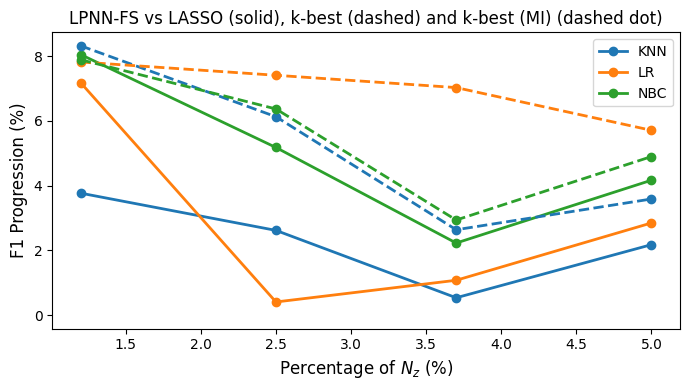

In [76]:
# Graphiques pour k-best/k-bestmi/lasso
plot_progressions(
    nz_percentages,
    [lasso_f1_progression, kbest_f1_progression],
    p=p_values[0], metrics="F1", 
    legend=" (MI)",
    save=True 
)

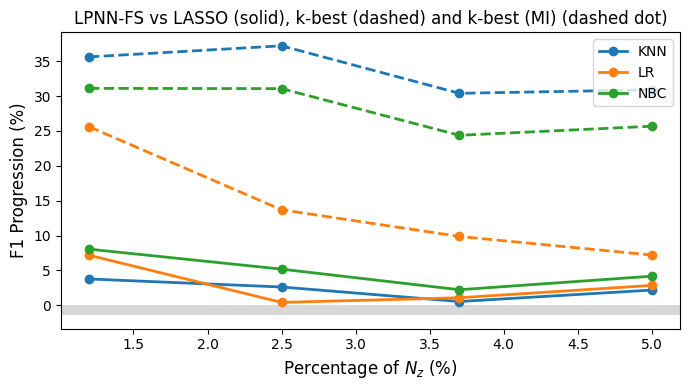

In [77]:
# Graphiques pour k-best/k-bestmi/lasso
plot_progressions(
    nz_percentages,
    [lasso_f1_progression, kbestmi_f1_progression],
    p=p_values[0], metrics="F1",
    save=True 
)